In [12]:
import numpy as np
from graphviz import Digraph, Graph

In [67]:
class Node: 
    def __init__(self, value):
        self.value = value
        self.leftchild = None
        self.rightchild = None
        
    def add_children(self, left=None, right=None):
        if left:
            self.leftchild = left
        if right:
            self.rightchild = right

def get_basic_btree():
    root = Node(8)
    # level 1
    left1 = Node(4)
    right1 = Node(10)
    root.add_children(left=left1, right=right1)

    # level 2
    left2a = Node(2)
    right2b = Node(6)
    right2d = Node(20)
    left1.add_children(left=left2a, right=right2b)
    right1.add_children(right=right2d)
    return root

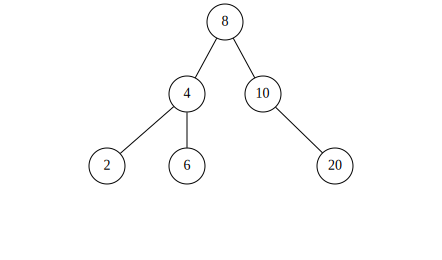

In [176]:
def level_order_grf_bld(node, grf, is_root=True):
    if node:
        if is_root:
            grf.node(str(hash(node)), str(node.value), shape="circle", fixedsize="true")
            
        if node.leftchild:
            grf.node(str(hash(node.leftchild)), str(node.leftchild.value), shape="circle", fixedsize="true")
            grf.edge(str(hash(node)), str(hash(node.leftchild)))
        else:
            grf.node(str(hash(node)) + "_left", "-1", shape="none", style="invisible")
            grf.edge(str(hash(node)), str(hash(node)) + "_left", style="invisible")
        
        if node.rightchild:
            grf.node(str(hash(node.rightchild)), str(node.rightchild.value), shape="circle", fixedsize="true")
            grf.edge(str(hash(node)), str(hash(node.rightchild)))
        else:
            grf.node(str(hash(node)) + "_right", "-1", shape="none", style="invisible")
            grf.edge(str(hash(node)), str(hash(node)) + "_right", style="invisible")
        
        level_order_grf_bld(node.leftchild, grf)
        level_order_grf_bld(node.rightchild, grf)
        

def print_tree(root):
    grf = Graph(format="png", graph_attr={'nodesep': '.3'})
    level_order_grf_bld(root, grf)
    
    return grf
    
root = get_basic_btree()
grf = print_tree(root)
grf

# Types of Trees

## Balanced Binary Tree
A binary tree, each node has up to two children, whose height is $O(log(n)) \rightarrow$ Provides $O(log(n))$ time for insertion, deletion, and search

## Binary Search Tree
A binary tree which every node has the relationship $\text{node}_{\text{leftchild}} \leq \text{node}_{\text{root}} < \text{node}_{\text{rightchild}}$  

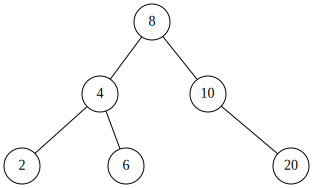

In [42]:
grf = Graph(format="png", graph_attr={'nodesep': '.1'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6a", "-1", shape="none", style="invisible")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("6", "20", shape="circle", fixedsize="true")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6a", style="invisible")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "6")

grf

## Complete Binary Tree
A binary tree in which every level of the tree is fully filled, except for perhaps the last level which would be filled from left to right.  

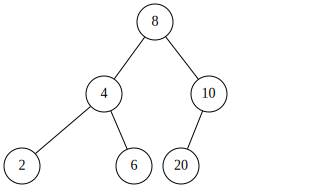

In [45]:
grf = Graph(format="png", graph_attr={'nodesep': '.15'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6", "20", shape="circle", fixedsize="true")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("6c", "-1", shape="none", style="invisible")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "6c", style="invisible")

grf

## Full Binary Tree
A full binary tree is a binary tree in which every node has either zero children or two children.

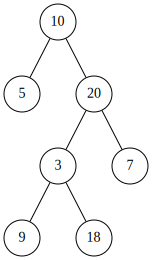

In [48]:
grf = Graph(format="png", graph_attr={'nodesep': '.5'})

grf.node("1", "10", shape="circle", fixedsize="true")
grf.node("2", "5", shape="circle", fixedsize="true")
grf.node("3", "20", shape="circle", fixedsize="true")
grf.node("4", "3", shape="circle", fixedsize="true")
grf.node("5", "7", shape="circle", fixedsize="true")
grf.node("6", "9", shape="circle", fixedsize="true")
grf.node("7", "18", shape="circle", fixedsize="true")

grf.edges(["12", "13", "34", "35", "46", "47"])

grf

## Perfect Binary Tree

A perfect binary tree is one where all interior nodes have 2 children and all left nodes are at the same level. 

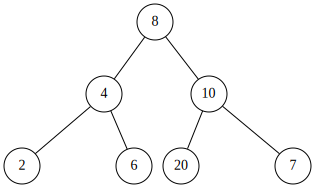

In [50]:
grf = Graph(format="png", graph_attr={'nodesep': '.15'})

grf.node("1", "8", shape="circle", fixedsize="true")
grf.node("2", "4", shape="circle", fixedsize="true")
grf.node("3", "10", shape="circle", fixedsize="true")
grf.node("4", "2", shape="circle", fixedsize="true")
grf.node("4b", "-1", shape="none", style="invisible")
grf.node("5", "6", shape="circle", fixedsize="true")

grf.node("6", "20", shape="circle", fixedsize="true")
grf.node("6b", "-1", shape="none", style="invisible")
grf.node("7", "7", shape="circle", fixedsize="true")

grf.edges(["12", "13", "24"])
grf.edge("2", "4b", style="invisible")
grf.edge("2", "5")
grf.edge("3", "6")
grf.edge("3", "6b", style="invisible")
grf.edge("3", "7")

grf

# Binary Tree Traversal

## Level Traversal

        

In [81]:
def level_traversal(node, visited, is_root=False):
    if node:
        if is_root:
            visited.append(node.value)
        if node.leftchild: visited.append(node.leftchild.value)
        if node.rightchild: visited.append(node.rightchild.value)
    
        level_traversal(node.leftchild, visited)
        level_traversal(node.rightchild, visited)

visited = []
root = get_basic_btree()
level_traversal(root, visited, is_root=True)
print(visited)

[8, 4, 10, 2, 6, 20]


## In-Order Traversal: left-current-right

In [79]:
def in_order_traversal(node, visited):
    if node.leftchild:
        in_order_traversal(node.leftchild, visited)
    visited.append(node.value)
    if node.rightchild:
        in_order_traversal(node.rightchild, visited)

visited = []
root = get_basic_btree()
in_order_traversal(root, visited)
print(visited)

[2, 4, 6, 8, 10, 20]


## Pre-Order Traversal: current-left-right

In [78]:
def pre_order_traversal(node, visited):
    visited.append(node.value)
    if node.leftchild:
        pre_order_traversal(node.leftchild, visited)
    if node.rightchild:
        pre_order_traversal(node.rightchild, visited)

visited = []
root = get_basic_btree()
pre_order_traversal(root, visited)
print(visited)

[8, 4, 2, 6, 10, 20]


## Post-Order Traversal: left-right-current

In [76]:
def post_order_traversal(node, visited):
    if node.leftchild:
        post_order_traversal(node.leftchild, visited)
    if node.rightchild:
        post_order_traversal(node.rightchild, visited)
    visited.append(node.value)

visited = []
root = get_basic_btree()
post_order_traversal(root, visited)
print(visited)

[2, 6, 4, 20, 10, 8]


# Min Heap Using Node Class

A complete binary tree where each node is smaller than its children. Similar for Max heap

## Build a Min Heap

Start


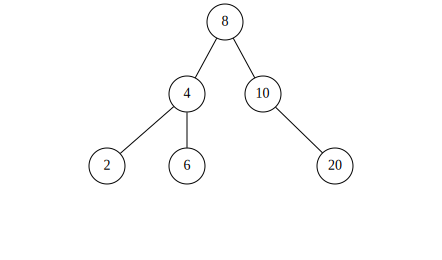

In [172]:
def minheap_it_up(node):
    # If not a leaf
    if node.leftchild and node.rightchild:
        min_n = node
        if node.leftchild and min_n.value > node.leftchild.value:
            min_n = node.leftchild
        if node.rightchild and min_n.value > node.rightchild.value:
            min_n = node.rightchild
        
        if min_n != node:
            node_v = node.value
            node.value = min_n.value
            min_n.value = node_v
            minheap_it_up(min_n)
            
def level_order_on_stack(node, stack, is_root=False):
    if node:
        if is_root:
            stack.insert(0, node)
        if node.leftchild: stack.insert(0, node.leftchild)
        if node.rightchild: stack.insert(0, node.rightchild)
        
        level_order_on_stack(node.leftchild, stack)
        level_order_on_stack(node.rightchild, stack)
        
def build_min_heap(root):
    node_stack = []
    level_order_on_stack(root, node_stack, is_root=True)
    while node_stack[0].leftchild is None and node_stack[0].rightchild is None:
        _ = node_stack.pop(0)
    
    for node in node_stack:
        minheap_it_up(node)
    
root = get_basic_btree()
grf_prev =print_tree(root)
print("Start")
grf_prev

Min Heap


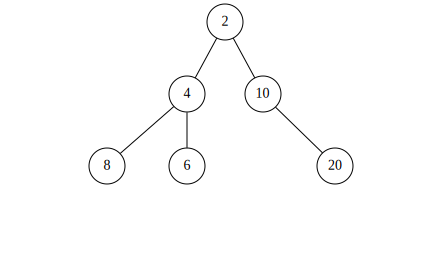

In [173]:
build_min_heap(root)
grf_min_heap = print_tree(root)
print("Min Heap")
grf_min_heap

## Extract Min Element and Maintain Heap

In [166]:
# using root from above that is a min heap
def get_min_heap_element(root):
    stack = []
    level_order_on_stack(root, stack, is_root=True)

    # Move last element, right most leaf to root
    last_node = stack.pop(0)
    
    # Remove parent link
    while stack[0].leftchild != last_node and stack[0].rightchild != last_node:
        _ = stack.pop(0)
    
    if stack[0].leftchild == last_node:
        stack[0].leftchild = None
    else:
        stack[0].rightchild = None
    
    # Add root's children to new root and remove links from old root
    last_node.leftchild = root.leftchild
    last_node.rightchild = root.rightchild
    
    root.leftchild = None
    root.rightchild = None
    
    #Call minheap it up at root
    minheap_it_up(last_node)
    
    return root, last_node

min_node, new_root = get_min_heap_element(root)

Min Element: 2


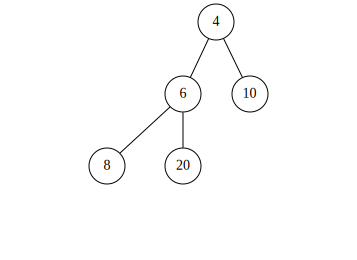

In [174]:
grf = print_tree(new_root)
print(f"Min Element: {min_node.value}")
grf

## Insert Element Maintain Heap

In [ ]:
# Using original min heap created above
def insert_into_minheap(root, node):
    # find parent of last node
    node_stack = []
    level_order_on_stack(root, node_stack, is_root=True)
    for i in range(1, len(node_stack)):
        if node_stack[i].leftchild == node_stack[0] or node_stack[i].rightchild == node_stack[0]:
            break
    
    # case 1: insert to parents right
    # case 2: insert as new left child on same row
    # case 3: insert as new left child on new row
        
        